# Signals, Systems, and Convolution (CS 198-96: Intro to Neurotechnology)
### v1 (Spring 2020) - Deven Navani

This is a high-level but expansive introduction to signal processing basics. We have heavily biased this towards those looking to implement some form of signal processing in code right away. Therefore, this introduction is code-heavy.

Please make sure you have Numpy, SciPy, and matplotlib installed before proceeding.

## Signals

It is convenient to think of **signals** as functions of $1$ or more variables. A speech signal, for example, is a function of time. Image signals are functions of two spatial variables ($x$ and $y$). Video signals are functions of $x$, $y$, and time. This guide will focus on signals that are functions of a single variable, time.

We have **discrete-time** signals and we have **continuous-time** signals. A continuous-time signal $x(t)$ depends on some real-valued time variable $t$ and a discrete-time signal $x[n]$ depends on some integer-valued variable $n$ that indexes instants of time. This guide will focus on discrete-time signals.

Discrete-time signals are sometimes inherently discrete (e.g. number of cars that pass through a tunnel every day). However, they can also be acquired by sampling continous-time signals. In this case, a discrete-time signal $x[n] = X(nT)$, where $1/T$ is the **sampling rate** at which the continuous-time signal $X(t)$ is sampled.

There are two special discrete-time signals that are useful to be familiar with:

1. **Unit Impulse**: 

$$ \delta[n] = \begin{cases} 
      1 & n = 0 \\
      0 & n \neq 0 
   \end{cases}
$$

2. **Unit Step**: 

$$ u[n] = \begin{cases} 
      1 & n \geq 0 \\
      0 & n < 0 
   \end{cases}
$$

Run the code cell below to see plots of the unit impulse and the unit step.

Text(0.5, 1.0, 'Unit Impulse')

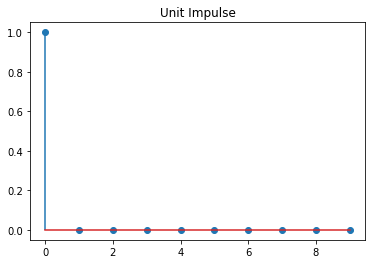

In [7]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
plt.stem(signal.unit_impulse(10), use_line_collection=True)
plt.title("Unit Impulse")

**Q:** Write the unit impulse in terms of the unit step.

<span style="color:blue">**A:** (TODO - Double click me and type your answer here!)</span>

**Q:** Write the unit step in terms of the unit impulse.

<span style="color:blue">**A:** (TODO - Double click me and type your answer here!)</span>

## Systems

The definition of a **system** is farily straightforward: it is a process by which input signals are transformed to output signals. For a discrete-time system, we typically denote inputs as $x[n]$ and outputs as $y[n]$. In this notebook we will represent systems as $x[n] \rightarrow y[n]$.

It is more useful, however, to discuss properties of systems.

### System Properties

**1. Memory**

A system is **memoryless** if its output at any given time depends on the input only at that time.

**2. Causality**

A system is **causal** if its output at any given time depends on the input only at that time and previous times, not future times.

**3. Stability**

A system is **stable** if all bounded inputs generate bounded outputs. This is known as **BIBO Stability**. Alternatively, a system is unstable if there exists a bounded input that produces an unbounded output.

**4. Linearity**

A system is **linear** if it satisfies two conditions:

* *Scaling* - for any $x[n] \rightarrow y[n]$ system and constant $a$, $ax[n] \rightarrow ay[n]$
* *Superposition* - for any two systems $x_1[n] \rightarrow y_1[n]$ and $x_2[n] \rightarrow y_2[n]$, $x_1[n] + x_2[n] \rightarrow y_1[n] + y_2[n]$

Here's a quick way to check if a system is not linear: give it an input of $0$. By the scaling property ($a=0$), if the output isn't $0$, the system isn't linear.

**5. Time-Invariance**

A system is **time-invariant** if a time shift in the input causes the identical time shift in the output:

$$x[n-N] \rightarrow y[n-N]$$

A good way to think about time-invariance is to ask yourself whether the rule for generating the output changes with time. If it doesn't, your system is time-invariant.

## Linear Time-Invariant (LTI) Systems and Convolution

LTI systems are, yes, linear and time-invariant. We care about LTI systems because they have a remarkable property: the **impulse response** (denoted $h[n]$), which is the system's response to the unit impulse \\(\delta[n]\\), is *all we need* to determine the system's response to any other input.

It is important to understand why this is true. Firstly, we can rewrite the input to the system as such:

$$x[n] = \sum_{k=-\infty}^{\infty} x[k]\delta[n-k]$$

Assume our system is linear and time-invariant. Because of the superposition property of linear systems, we can calculate the output $y[n]$ of our system by determining the output for each input $x[k]\delta[n-k]$ and adding all these outputs.

By the scaling property of linear systems, to calculate the output for an input $x[k]\delta[n-k]$, we can calulate the output for input $\delta[n-k]$ and multiply by $x[k]$.

What is the output for input $\delta[n-k]$? Because $\delta[n] \rightarrow h[n]$ (by definition), and because our system is time-invariant, $\delta[n-k] \rightarrow h[n-k]$.

Therefore, $x[k]\delta[n-k] \rightarrow x[k]h[n-k]$. We can now write our output as such:

$$y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$

As you can see, all we need to determine our output is the input signal and impulse response. The operation on the right is called the **convolution** of signals $x$ and $h$ and is denoted by $x * h$.

$$(x * h)[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$

Let's dive deeper into convolution with some code. To compute convolutions, we use the Numpy function for convolution, [np.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html), which takes in three arguments:

- `x`, a numpy array representing the signal $x(n)$.
- `h`, a numpy array representing the signal $h(n)$, our system's impulse response. 
- `mode`, a string specifying how to truncate the convolution, if at all. 

It returns $y(n) = (x * h)(n)$, with some subtle differences in how the boundaries are handled based on what you pass in for `mode`. There are three options for this parameter: `full`, `same`, and `valid`. Rather than explain the differences in words, we'll go through some actual examples.